# By Saeed Dehghani

## Furniture Sales Forecast

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- The Global Superstore dataset is data from a fictional global retail chain that sells office supplies.


- The Dataset includes data for the Sales of multiple products sold by a company along with subsequent information related to  geography, Product categories, and subcategories, sales, and profits, etc.


- we want forecast furniture categories with machine learning methods

In [2]:
df = pd.read_csv("super store.csv")

## Part1: EDA and prepare data

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2014-103800,1/3/2014,1/7/2014,Standard Class,Consumer,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,CA-2014-112326,1/4/2014,1/8/2014,Standard Class,Home Office,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,3,CA-2014-112326,1/4/2014,1/8/2014,Standard Class,Home Office,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,4,CA-2014-112326,1/4/2014,1/8/2014,Standard Class,Home Office,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,5,CA-2014-141817,1/5/2014,1/12/2014,Standard Class,Consumer,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [4]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2017-143259,12/30/2017,1/3/2018,Standard Class,Consumer,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
9990,9991,CA-2017-143259,12/30/2017,1/3/2018,Standard Class,Consumer,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
9991,9992,CA-2017-115427,12/30/2017,1/3/2018,Standard Class,Corporate,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
9992,9993,CA-2017-115427,12/30/2017,1/3/2018,Standard Class,Corporate,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
9993,9994,CA-2017-156720,12/30/2017,1/3/2018,Standard Class,Consumer,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Segment       9994 non-null   object 
 6   Product ID    9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Product Name  9994 non-null   object 
 10  Sales         9994 non-null   float64
 11  Quantity      9994 non-null   int64  
 12  Discount      9994 non-null   float64
 13  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [6]:
#Date
df["Order Date"] = pd.to_datetime(df["Order Date"])

#Extract Year
df["Year"] = pd.DatetimeIndex(df["Order Date"]).year

#Extract Month
df["Month"] = pd.DatetimeIndex(df["Order Date"]).month

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,1,CA-2014-103800,2014-01-03,1/7/2014,Standard Class,Consumer,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2014,1
1,2,CA-2014-112326,2014-01-04,1/8/2014,Standard Class,Home Office,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,2014,1
2,3,CA-2014-112326,2014-01-04,1/8/2014,Standard Class,Home Office,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,2014,1
3,4,CA-2014-112326,2014-01-04,1/8/2014,Standard Class,Home Office,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2014,1
4,5,CA-2014-141817,2014-01-05,1/12/2014,Standard Class,Consumer,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,2014,1


In [8]:
#TS for Monthly Sales
ts1 = df.groupby(["Category","Year","Month"],as_index=False)["Sales"].sum()

In [9]:
ts1

,Category,Year,Month,Sales
0,Furniture,2014,1,6242.525
1,Furniture,2014,2,1839.658
2,Furniture,2014,3,14573.956
3,Furniture,2014,4,7944.837
4,Furniture,2014,5,6912.787
...,...,...,...,...
139,Technology,2017,8,17619.162
140,Technology,2017,9,26942.603
141,Technology,2017,10,32855.663
142,Technology,2017,11,49918.773


In [10]:
d = pd.Series(np.arange(2014,2018),name="Year").repeat(12).reset_index(drop=True)
s = pd.Series(list(np.arange(1,13))*4,name="Month")
monthly_sales = pd.concat([d,s],axis=1)

In [11]:
monthly_sales.head()

,Year,Month
0,2014,1
1,2014,2
2,2014,3
3,2014,4
4,2014,5


In [12]:
monthly_sales.tail()

,Year,Month
43,2017,8
44,2017,9
45,2017,10
46,2017,11
47,2017,12


In [13]:
#Furniture Sales
monthly_sales["furniture"] = ts1[ts1["Category"]=="Furniture"]["Sales"]

#Office Sales
monthly_sales["officesupply"] = ts1[ts1["Category"]=="Office Supplies"]["Sales"].reset_index(drop=True)

#Technology Sales
monthly_sales["technology"] = ts1[ts1["Category"]=="Technology"]["Sales"].reset_index(drop=True)

In [14]:
monthly_sales.head()

,Year,Month,furniture,officesupply,technology
0,2014,1,6242.525,4851.080,3143.290
1,2014,2,1839.658,1071.724,1608.510
2,2014,3,14573.956,8605.879,32511.174
3,2014,4,7944.837,11155.074,9195.434
4,2014,5,6912.787,7135.624,9599.876


In [15]:
monthly_sales["total"] = monthly_sales.iloc[:,2:5].apply(sum,axis=1)

In [16]:
monthly_sales.head()

,Year,Month,furniture,officesupply,technology,total
0,2014,1,6242.525,4851.080,3143.290,14236.895
1,2014,2,1839.658,1071.724,1608.510,4519.892
2,2014,3,14573.956,8605.879,32511.174,55691.009
3,2014,4,7944.837,11155.074,9195.434,28295.345
4,2014,5,6912.787,7135.624,9599.876,23648.287


In [17]:
monthly_sales.tail()

,Year,Month,furniture,officesupply,technology,total
43,2017,8,15441.8740,30059.852,17619.162,63120.8880
44,2017,9,29028.2060,31895.843,26942.603,87866.6520
45,2017,10,21884.0682,23037.192,32855.663,77776.9232
46,2017,11,37056.7150,31472.337,49918.773,118447.8250
47,2017,12,31407.4668,30436.942,21984.910,83829.3188


In [18]:
#Create time index and convert data to time series
date = pd.date_range(start="2014-1",end="2017-12",freq="MS")

In [19]:
monthly_sales.set_index(date,inplace=True)

In [20]:
monthly_sales.drop(["Year","Month"],axis=1,inplace=True)

In [21]:
monthly_sales.head()

,furniture,officesupply,technology,total
2014-01-01,6242.525,4851.080,3143.290,14236.895
2014-02-01,1839.658,1071.724,1608.510,4519.892
2014-03-01,14573.956,8605.879,32511.174,55691.009
2014-04-01,7944.837,11155.074,9195.434,28295.345
2014-05-01,6912.787,7135.624,9599.876,23648.287


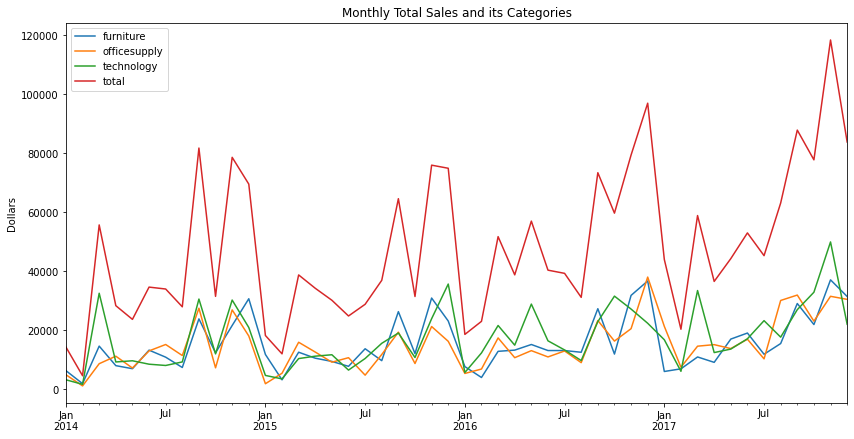

In [22]:
#Total Sales and its Categories
ax = monthly_sales.plot(figsize=(14,7))
ax.set_ylabel("Dollars")
ax.set_title("Monthly Total Sales and its Categories")
plt.show()

### Focusing on forecast furniture

In [23]:
Furniture_Sales = pd.DataFrame(monthly_sales.iloc[:,0],index=monthly_sales.index)

In [24]:
Furniture_Sales.head()

,furniture
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


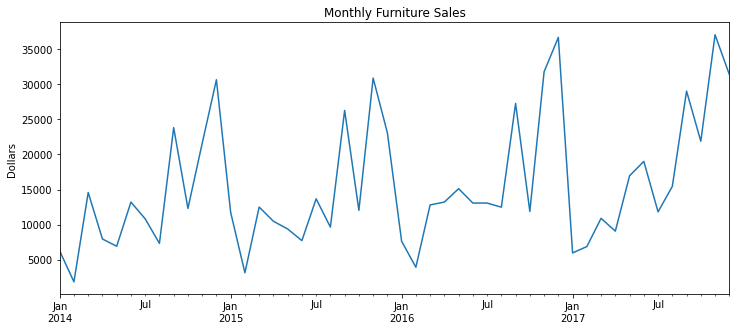

In [25]:
# plot Furniture Sales
ax=Furniture_Sales["furniture"].plot(figsize=(12,5))
ax.set_ylabel("Dollars")
ax.set_title("Monthly Furniture Sales")
plt.show()

In [26]:
Furniture_Sales.describe()

,furniture
count,48.000000
mean,15458.329069
std,9103.800668
min,1839.658000
25%,9297.702400
50%,12650.437500
75%,21644.671575
max,37056.715000


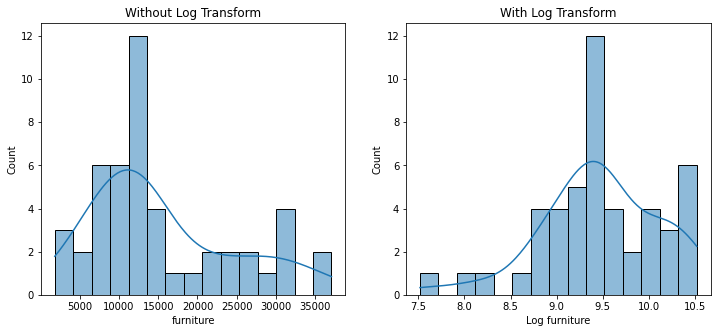

In [27]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(Furniture_Sales["furniture"], kde=True,bins=15)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.histplot(np.log(Furniture_Sales["furniture"]),kde=True,bins=15)
plt.xlabel("Log furniture")
plt.title("With Log Transform")

plt.show()

- it highly skewed

### Is mean and variance constant?

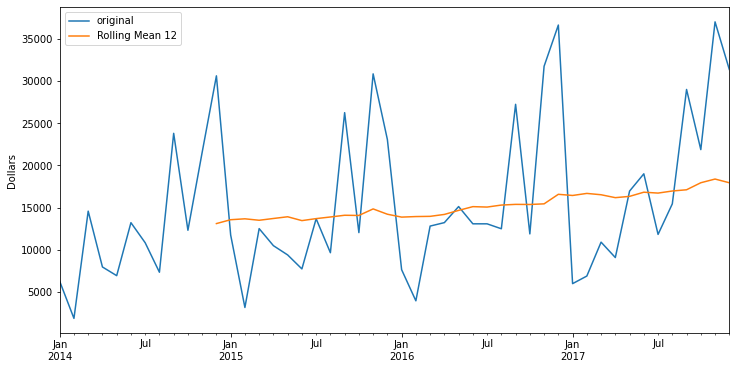

In [28]:
plt.figure(figsize = (10,7))
Furniture_Sales["furniture"].plot(figsize=(12,6), legend=True, label="original")
Furniture_Sales["furniture"].rolling(12, center=False).mean().plot(legend=True, label="Rolling Mean 12")
plt.ylabel("Dollars")
plt.show()

- it seems mean is constant.

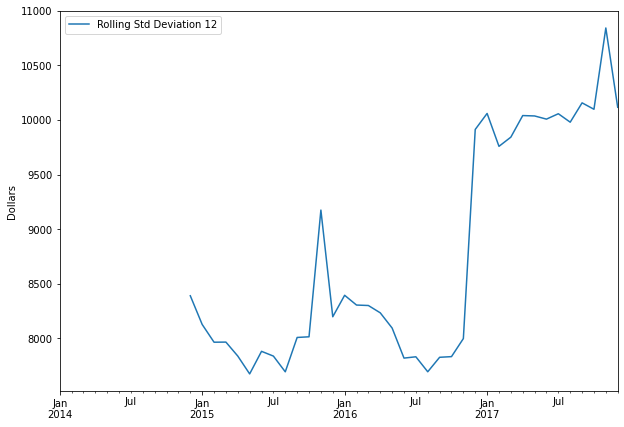

In [29]:
plt.figure(figsize = (10,7))
Furniture_Sales["furniture"].rolling(12).std().plot(legend=True, label="Rolling Std Deviation 12")
plt.ylabel("Dollars")
plt.show()

- variance is increasing.

### Adding holidays and season

In [30]:
Furniture_Sales.reset_index(inplace=True)

In [31]:
Furniture_Sales["year"] = Furniture_Sales["index"].dt.year
Furniture_Sales["month"] = Furniture_Sales["index"].dt.month
Furniture_Sales["season"] = Furniture_Sales["index"].dt.month

In [32]:
Furniture_Sales["season"] = Furniture_Sales["season"].replace({1:"Spring",2:"Spring",3:"Spring",
                                                               4:"Summer",5:"Summer",6:"Summer",
                                                               7:"Autumn",8:"Autumn",9:"Autumn",
                                                              10:"Winter",11:"Winter",12:"Winter"})

In [33]:
Furniture_Sales.head()

,index,furniture,year,month,season
0,2014-01-01,6242.525,2014,1,Spring
1,2014-02-01,1839.658,2014,2,Spring
2,2014-03-01,14573.956,2014,3,Spring
3,2014-04-01,7944.837,2014,4,Summer
4,2014-05-01,6912.787,2014,5,Summer


In [34]:
#Adding holidays column to indicate whether a day was a holiday as per the US calendar or not
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start = Furniture_Sales["index"].min() , end = Furniture_Sales["index"].max())
Furniture_Sales["holiday"] = Furniture_Sales["index"].isin(holidays)

In [35]:
#converting the holiday column to 1 and 0, 1 indicating a holiday and 0 not a holiday
mapped = {True:1, False:0}
Furniture_Sales["holiday"] = Furniture_Sales["holiday"].map(mapped)
Furniture_Sales.head()

,index,furniture,year,month,season,holiday
0,2014-01-01,6242.525,2014,1,Spring,1
1,2014-02-01,1839.658,2014,2,Spring,0
2,2014-03-01,14573.956,2014,3,Spring,0
3,2014-04-01,7944.837,2014,4,Summer,0
4,2014-05-01,6912.787,2014,5,Summer,0


In [36]:
Furniture_Sales["holiday"].value_counts(normalize=True).round(3)

0    0.917
1    0.083
Name: holiday, dtype: float64

In [37]:
weekdays = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3: "Thursday", 4: "Friday", 5:"Saturday", 6:"Sunday"}

Furniture_Sales["weekday"] = Furniture_Sales["index"].dt.weekday.map(weekdays)

In [38]:
Furniture_Sales.head()

,index,furniture,year,month,season,holiday,weekday
0,2014-01-01,6242.525,2014,1,Spring,1,Wednesday
1,2014-02-01,1839.658,2014,2,Spring,0,Saturday
2,2014-03-01,14573.956,2014,3,Spring,0,Saturday
3,2014-04-01,7944.837,2014,4,Summer,0,Tuesday
4,2014-05-01,6912.787,2014,5,Summer,0,Thursday


In [39]:
Furniture_Sales["weekday"].value_counts(normalize=True).round(3)

Wednesday    0.167
Friday       0.146
Saturday     0.146
Tuesday      0.146
Sunday       0.146
Thursday     0.125
Monday       0.125
Name: weekday, dtype: float64

In [40]:
#adding in another column which indicates 'non-working' days which include weekends and holidays
Furniture_Sales["non_working"] = Furniture_Sales.apply(lambda x: "non-working" if \
                                         ((x["holiday"] == 1) or (x["weekday"] in ["Saturday", "Sunday"]))
                                         else "working", axis = 1)

In [41]:
Furniture_Sales.head()

,index,furniture,year,month,season,holiday,weekday,non_working
0,2014-01-01,6242.525,2014,1,Spring,1,Wednesday,non-working
1,2014-02-01,1839.658,2014,2,Spring,0,Saturday,non-working
2,2014-03-01,14573.956,2014,3,Spring,0,Saturday,non-working
3,2014-04-01,7944.837,2014,4,Summer,0,Tuesday,working
4,2014-05-01,6912.787,2014,5,Summer,0,Thursday,working


In [42]:
Furniture_Sales["non_working"].value_counts(normalize=True).round(2)

working        0.62
non-working    0.38
Name: non_working, dtype: float64

### Average monthly furniture sell over the entire period 2014-17

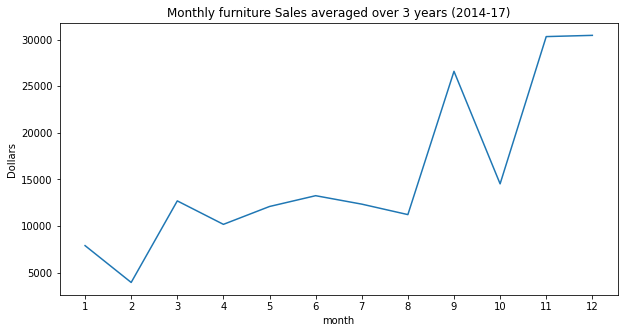

In [43]:
Furniture_Sales.groupby("month")["furniture"].mean().plot(figsize = (10,5))
plt.ylabel("Dollars")
plt.xticks(Furniture_Sales["month"].unique())
plt.title("Monthly furniture Sales averaged over 3 years (2014-17)")
plt.show()

- may be there is a overall increasing trend.

### Distribution of furniture sells by season

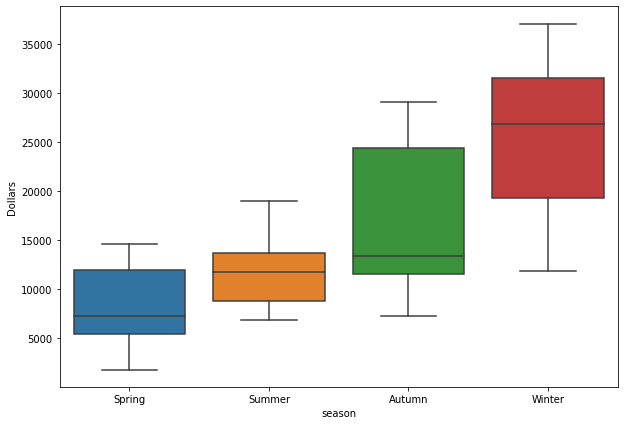

In [44]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "season", y = "furniture", data = Furniture_Sales)
plt.ylabel("Dollars")
plt.show()

### Distribution of furniture sells by working and not working days

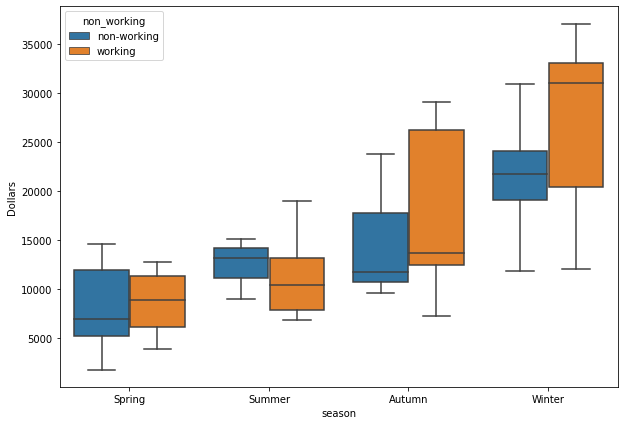

In [45]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "season", y = "furniture", data = Furniture_Sales,hue="non_working")
plt.ylabel("Dollars")
plt.show()

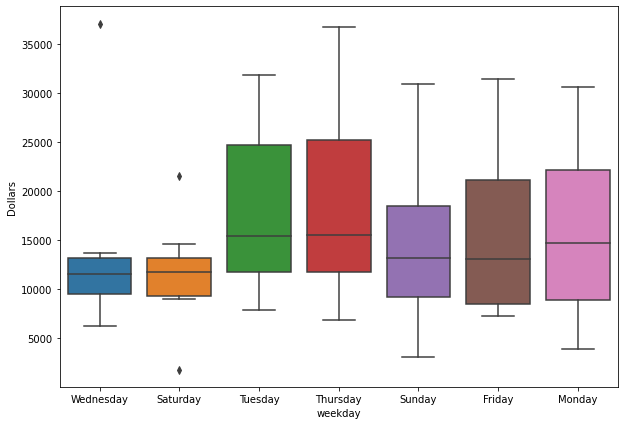

In [46]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "weekday", y = "furniture", data = Furniture_Sales)
plt.ylabel("Dollars")
plt.show()

In [47]:
# use Year for trend and Month for seasonality
Furniture_Sales["series"] = np.arange(1,len(Furniture_Sales)+1)
Furniture_Sales["non_working"] = Furniture_Sales["non_working"].replace({"non-working":0,"working":1})

In [48]:
Furniture_Sales.head()

,index,furniture,year,month,season,holiday,weekday,non_working,series
0,2014-01-01,6242.525,2014,1,Spring,1,Wednesday,0,1
1,2014-02-01,1839.658,2014,2,Spring,0,Saturday,0,2
2,2014-03-01,14573.956,2014,3,Spring,0,Saturday,0,3
3,2014-04-01,7944.837,2014,4,Summer,0,Tuesday,1,4
4,2014-05-01,6912.787,2014,5,Summer,0,Thursday,1,5


In [49]:
Furniture_Sales.tail()

,index,furniture,year,month,season,holiday,weekday,non_working,series
43,2017-08-01,15441.8740,2017,8,Autumn,0,Tuesday,1,44
44,2017-09-01,29028.2060,2017,9,Autumn,0,Friday,1,45
45,2017-10-01,21884.0682,2017,10,Winter,0,Sunday,0,46
46,2017-11-01,37056.7150,2017,11,Winter,0,Wednesday,1,47
47,2017-12-01,31407.4668,2017,12,Winter,0,Friday,1,48


In [50]:
Furniture_Sales = Furniture_Sales.loc[:,["furniture","series","year","month","holiday","non_working"]]

In [51]:
Furniture_Sales.head()

,furniture,series,year,month,holiday,non_working
0,6242.525,1,2014,1,1,0
1,1839.658,2,2014,2,0,0
2,14573.956,3,2014,3,0,0
3,7944.837,4,2014,4,0,1
4,6912.787,5,2014,5,0,1


In [52]:
# we used 36 months for train and 12 months for test
train = Furniture_Sales.iloc[0:36]
test = Furniture_Sales.iloc[36:]

In [53]:
train.head()

,furniture,series,year,month,holiday,non_working
0,6242.525,1,2014,1,1,0
1,1839.658,2,2014,2,0,0
2,14573.956,3,2014,3,0,0
3,7944.837,4,2014,4,0,1
4,6912.787,5,2014,5,0,1


In [54]:
train.shape, test.shape

((36, 6), (12, 6))

## Part2: Build Models and Evaluate

In [55]:
from pycaret.regression import *

s = setup(data = train, test_data = test, target = "furniture",
          fold_strategy = "timeseries",numeric_features = ["series","year","holiday","non_working"],
          categorical_features=["month"], fold = 3,session_id = 123,transform_target=True,
          data_split_shuffle=False,remove_perfect_collinearity=False)

,Description,Value
0,session_id,123
1,Target,furniture
2,Original Data,"(36, 6)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(36, 16)"


In [56]:
best = compare_models(sort = "MAE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4765.6530,49360327.5714,6674.9831,0.2436,0.4454,0.2980,0.1000
ada,AdaBoost Regressor,5071.0090,54722040.4997,7315.6272,0.2054,0.4467,0.3436,0.0600
dt,Decision Tree Regressor,5166.8357,51591533.2134,6853.7453,0.2158,0.4748,0.3249,0.0200
rf,Random Forest Regressor,5182.9205,50773697.4350,7110.1324,0.2720,0.4122,0.3322,0.1267
gbr,Gradient Boosting Regressor,5548.9080,59808337.2111,7593.0616,0.1116,0.5002,0.4281,0.0333
omp,Orthogonal Matching Pursuit,5792.8200,87132738.9954,9229.9566,-0.1819,0.5048,0.2798,0.0233
catboost,CatBoost Regressor,6375.8913,79255304.0036,8898.4696,-0.1134,0.5306,0.3935,0.5367
xgboost,Extreme Gradient Boosting,6431.2291,67839073.3333,7815.0415,-0.0503,0.4776,0.5395,0.1667
knn,K Neighbors Regressor,6778.0459,104020487.1612,10076.5496,-0.4141,0.6307,0.4191,0.0233
llar,Lasso Least Angle Regression,7007.5140,107324493.2350,10261.6471,-0.4601,0.6304,0.4220,0.0200


In [57]:
tuned = tune_model(best,optimize= "MAE",n_iter=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5399.1102,73115463.5876,8550.7581,-0.2388,0.6272,0.4678
1,6922.3519,96339179.8224,9815.2524,-0.3074,0.5891,0.3759
2,5630.7874,53217667.4293,7295.0440,0.3656,0.3354,0.2490
Mean,5984.0832,74224103.6131,8553.6848,-0.0602,0.5172,0.3643
SD,670.1640,17621729.3854,1028.8728,0.3024,0.1295,0.0897


In [58]:
prediction_holdout = predict_model(tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,5061.3256,34406510.0568,5865.7063,0.6332,0.3430,0.3209


In [59]:
mae = abs(prediction_holdout["Label"] - test["furniture"].reset_index(drop=True))
mae.describe()

count       12.000000
mean      5061.325734
std       3096.536501
min       1317.321994
25%       3458.394980
50%       4385.226064
75%       5668.045567
max      12963.885141
dtype: float64

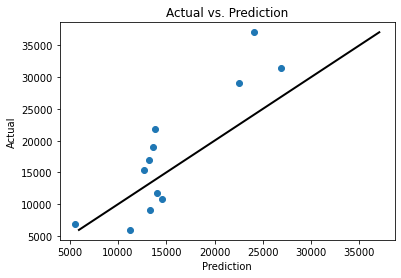

In [60]:
#Actual vs. Prediction in test dataset with 45 degree line
plt.scatter(x = prediction_holdout["Label"], y = test["furniture"] )
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Actual vs. Prediction")

#Add 45 degree line
xp = np.linspace(test["furniture"].min(), test["furniture"].max(), 100)
plt.plot(xp, xp, "k", linewidth = 2)
plt.show()

In [61]:
predictions = predict_model(tuned,data=Furniture_Sales)# add a date column in the dataset
predictions.head()

,furniture,series,year,month,holiday,non_working,Label
0,6242.525,1,2014,1,1,0,8800.034487
1,1839.658,2,2014,2,0,0,3874.374158
2,14573.956,3,2014,3,0,0,11835.727469
3,7944.837,4,2014,4,0,1,10016.833739
4,6912.787,5,2014,5,0,1,9561.890097


In [62]:
predictions.rename(columns={"Label":"furniture_pred"},inplace=True)
predictions.head()

,furniture,series,year,month,holiday,non_working,furniture_pred
0,6242.525,1,2014,1,1,0,8800.034487
1,1839.658,2,2014,2,0,0,3874.374158
2,14573.956,3,2014,3,0,0,11835.727469
3,7944.837,4,2014,4,0,1,10016.833739
4,6912.787,5,2014,5,0,1,9561.890097


In [63]:
predictions.tail()

,furniture,series,year,month,holiday,non_working,furniture_pred
43,15441.8740,44,2017,8,0,1,12682.866538
44,29028.2060,45,2017,9,0,1,22513.376513
45,21884.0682,46,2017,10,0,0,13863.055125
46,37056.7150,47,2017,11,0,1,24092.829859
47,31407.4668,48,2017,12,0,1,26904.728028


In [64]:
predictions.set_index(date,inplace=True)

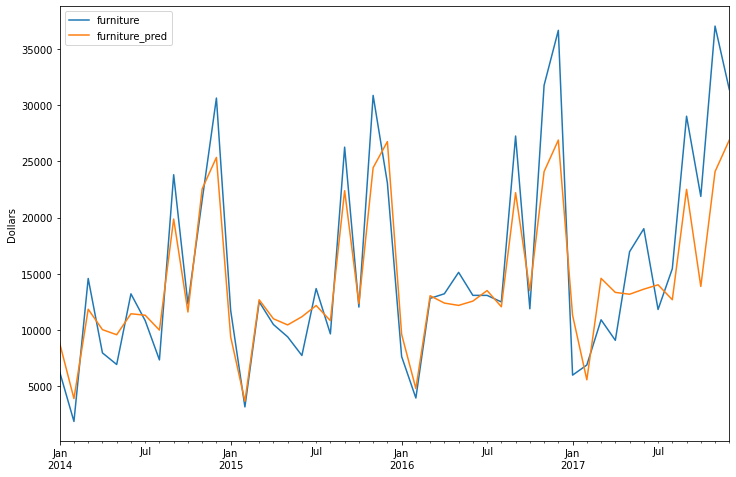

In [65]:
predictions["furniture"].plot(legend=True,figsize=(12,8))
predictions["furniture_pred"].plot(legend=True,figsize=(12,8))
plt.ylabel("Dollars")
plt.show()

## Part3: Forecast

In [66]:
final_best = finalize_model(tuned) # train model on whole data
future_df = pd.DataFrame({"series":[49,50,51] , "month":[1,2,3] , "year":[2018,2018,2018] ,
                         "holiday":[0,0,0] , "non_working":[1,1,0]})

In [67]:
future_df.head()

,series,month,year,holiday,non_working
0,49,1,2018,0,1
1,50,2,2018,0,1
2,51,3,2018,0,0


In [68]:
# forecast for 3 step ahead
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

,series,month,year,holiday,non_working,Label
0,49,1,2018,0,1,11900.579689
1,50,2,2018,0,1,5549.015406
2,51,3,2018,0,0,14179.794454


# End of code